In [2]:
sys.path.insert(1,'C:\\Users\\caell\\flatiron\\projects\\phase_2_project\\phase_2_project_chicago-sf-seattle-ds-082420\\src')
from data_download import *
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.regression.linear_model
import statsmodels.stats as stats
import statsmodels.stats.api as sms
from sklearn import preprocessing

import sys
%matplotlib inline
pd.set_option('display.max_columns', None)

NameError: name 'sys' is not defined

In [ ]:
salespath = r'C:\Users\caell\flatiron\projects\phase_2_project\phase_2_project_chicago-sf-seattle-ds-082420\data\EXTR_RPSale.csv'
parcelpath = r'C:\Users\caell\flatiron\projects\phase_2_project\phase_2_project_chicago-sf-seattle-ds-082420\data\EXTR_Parcel.csv'
residentialpath = r'C:\Users\caell\flatiron\projects\phase_2_project\phase_2_project_chicago-sf-seattle-ds-082420\data\EXTR_ResBldg.csv'
sales = pd.read_csv(salespath, encoding = 'ISO-8859-1')
parcels = pd.read_csv(parcelpath, encoding = 'ISO-8859-1')
residences = pd.read_csv(residentialpath, encoding = 'ISO-8859-1')

In [60]:
sales = sales[sales['DocumentDate'].astype(str).str.endswith('2019')]
sales = sales[(sales['SalePrice'] > 120000) & (sales['SalePrice'] < 3000000)]
sales.head()


,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot,PlatBlock,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
4,3027422,213043,120,12/20/2019,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C ...,SHAW HEATHER C ...,3,6,3,N,N,N,N,1,8,
49,2999169,919715,200,07/08/2019,192000,20190712001080,,,,,,,WAGNERESTATES LLC ...,SCHAFFER CORBIN ...,3,2,3,N,N,N,N,1,3,
98,3000673,894444,200,06/26/2019,185000,20190722001395,,,,,,,MAY THOMAS A+SHIRLEY E ...,KOCHEL RICHARD J+JANICE M ...,3,2,3,N,N,N,N,1,3,
210,3002257,940652,630,07/22/2019,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL ...,HANSON BRYAN L+KAILI ...,11,6,3,N,N,N,N,1,8,
420,3012934,615490,10,09/24/2019,775000,20190930002488,,,,,,,TALBOT MORGAN P ...,FICHTER CAROLINE ...,11,6,3,N,N,N,N,1,8,


In [62]:
combo = sales.merge(residences, on = ['Major','Minor'])
combo = combo.merge(parcels, on = ['Major','Minor'])
combo.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,PlatLot_x,PlatBlock_x,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,DirectionSuffix,ZipCode,Stories,BldgGrade,BldgGradeVar,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,PropName,PlatName,PlatLot_y,PlatBlock_y,Range,Township,Section,QuarterSection,PropType,Area,SubArea,SpecArea,SpecSubArea,DistrictName,LevyCode,CurrentZoning,HBUAsIfVacant,HBUAsImproved,PresentUse,SqFtLot,WaterSystem,SewerSystem,Access,Topography,StreetSurface,RestrictiveSzShape,InadequateParking,PcntUnusable,Unbuildable,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntLocation,WfntFootage,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,LotDepthFactor,TrafficNoise,AirportNoise,PowerLines,OtherNuisances,NbrBldgSites,Contamination,DNRLease,AdjacentGolfFairway,AdjacentGreenbelt,HistoricSite,CurrentUseDesignation,NativeGrowthProtEsmt,Easements,OtherDesignation,DeedRestrictions,DevelopmentRightsPurch,CoalMineHazard,CriticalDrainage,ErosionHazard,LandfillBuffer,HundredYrFloodPlain,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,3027422,213043,120,12/20/2019,560000,20191226000848,,,,,,,DOYLE REGAN M+STERLING C ...,SHAW HEATHER C ...,3,6,3,N,N,N,N,1,8,,1,1,27033 NE DOROTHY ST 98019,27033,,NE,DOROTHY,ST,,98019,1.0,7,0,1930,0,0,0,0,0,1930,0,0,0,0,550,,180,0,0,5,2,0,,3,0,0,2,1,0,0,0,1989,0,0,0,0,3,0,,DUVALL HILLS DIV NO. 04,12,,6,26,13,SE,R,70.0,2.0,NaN,NaN,DUVALL,1155,R4.5,1,1,2,10523,2,2,4,0,1,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
1,3002257,940652,630,07/22/2019,435000,20190730001339,,,,,,,CRAMER NEIL C+PAM R+ET AL ...,HANSON BRYAN L+KAILI ...,11,6,3,N,N,N,N,1,8,,1,1,22848 SE 264TH CT 98038,22848,,SE,264TH,CT,,98038,2.0,7,0,1057,0,918,0,0,0,1975,0,0,0,0,465,,45,0,0,5,2,0,,3,0,2,1,0,1,0,0,1994,0,0,0,0,3,2500,,WILDERNESS ESTATES,63,,6,22,27,SW,R,56.0,3.0,NaN,NaN,MAPLE VALLEY,1813,R-6,1,1,2,7392,2,2,4,0,1,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
2,3012934,615490,10,09/24/2019,775000,20190930002488,,,,,,,TALBOT MORGAN P ...,FICHTER CAROLINE ...,11,6,3,N,N,N,N,1,8,,1,1,10322 12TH AVE NW 98177,10322,,,12TH,AVE,NW,98177,1.0,7,0,1040,0,0,0,0,0,2080,1040,1040,7,0,0,N,0,0,0,5,1,100,N,4,0,1,1,1,0,0,0,1947,0,0,0,0,5,0,,NORTH VIEW TERRACE ADD,2,1,3,26,36,NW,R,39.0,3.0,NaN,NaN,SEATTLE,10,SF 7200,1,1,2,7102,2,2,4,0,1,0,2,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
3,2982060,347050,40,04/04/2019,648500,,,,,,,,BROWN MARK E+MARCIE K ...,MEDVED ROBERT J+JENNIFER E ...,11,6,3,N,N,N,N,1,8,,1,1,26034 231ST PL SE,26034,,,231ST,PL,SE,NaN,2.0,8,0,1390,0,1910,0,0,0,3300,0,0,0,0,590,,0,0,0,5,2,0,,5,1,0,2,1,0,0,0,2005,0,0,0,0,3,6000,,HOTSON ESTATES,4,,6,22,27,NW,R,56.0,3.0,NaN,NaN,MAPLE VALLEY,1813,R-4,1,1,2,5250,2,2,4,0,1,0,0,0,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N,N,0,0,0,0,N,N,0,0,N,N,N,0,0,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
4,2980836,937630,695,03/28/2019,550000,20190404001008,,,,,,,WOLFE BRUCE A+MEGAN D ...,ALBRECHT BRYSON+ALBRECHT S

In [63]:
combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28577 entries, 0 to 28576
Columns: 151 entries, ExciseTaxNbr to OtherProblems
dtypes: bool(1), float64(5), int64(83), object(62)
memory usage: 32.9+ MB


In [198]:
highlowcorrs = pd.concat([combo.corr()['SalePrice'].sort_values(ascending = False).head(10),
                      combo.corr()['SalePrice'].sort_values(ascending = True).head(10)],
                     axis = 0).sort_values(ascending = False)
highlowcorrs

SalePrice         1.000000
BldgGrade         0.597355
SqFtTotLiving     0.597180
SqFt2ndFloor      0.381816
SqFt1stFloor      0.372358
Township          0.355553
BathFullCount     0.324849
SqFtOpenPorch     0.316478
Bedrooms          0.282083
LakeWashington    0.269309
SaleReason       -0.017334
Area             -0.021197
SubArea          -0.026156
HeatSource       -0.042944
SaleInstrument   -0.052196
FpFreestanding   -0.057380
Access           -0.058564
LevyCode         -0.059911
Condition        -0.067671
PropertyClass    -0.102216
Name: SalePrice, dtype: float64

In [199]:
bigcorrs = combo[list(highlowcorrs.index)]

bigcorrs

,SalePrice,BldgGrade,SqFtTotLiving,SqFt2ndFloor,SqFt1stFloor,Township,BathFullCount,SqFtOpenPorch,Bedrooms,LakeWashington,SaleReason,Area,SubArea,HeatSource,SaleInstrument,FpFreestanding,Access,LevyCode,Condition,PropertyClass
0,560000,7,1930,0,1930,26,2,180,3,0,1,70.0,2.0,2,3,0,4,1155,3,8
1,435000,7,1975,918,1057,22,1,45,3,0,1,56.0,3.0,2,3,0,4,1813,3,8
2,775000,7,2080,0,1040,26,1,0,4,0,1,39.0,3.0,1,3,0,4,10,5,8
3,648500,8,3300,1910,1390,22,2,0,5,0,1,56.0,3.0,2,3,0,4,1813,3,8
4,550000,8,1560,540,370,25,1,0,2,0,1,82.0,11.0,3,3,0,4,10,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28572,1000000,8,1590,0,1290,24,1,0,3,0,1,34.0,5.0,2,3,0,4,1031,5,8
28573,850000,8,2896,1264,1146,22,2,96,5,0,1,49.0,8.0,2,3,0,3,1898,5,8
28574,650000,8,2040,1100,940,26,2,590,4,0,1,70.0,2.0,2,3,0,4,1155,3,8
28575,540000,7,1340,0,1340,26,1,110,3,0,1,2.0,2.0,1,3,0,4,2266,5,8


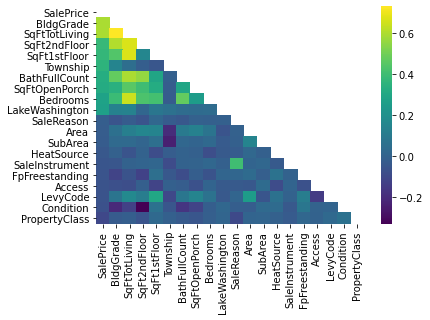

In [200]:
mask = np.triu(np.ones_like(bigcorrs.corr(), dtype=np.bool))
sns.heatmap(bigcorrs.corr(), mask= mask, cmap = 'viridis')

candidate columns shortlist
'BldgGrade','SqFtTotLiving', 'SqFt2ndFloor', 'SqFt1stFloor','Condition','LakeWashington'

,SalePrice,SqFtTotLiving,SqFt2ndFloor,SqFt1stFloor,Township,BathFullCount,SqFtOpenPorch,Bedrooms,LakeWashington,SaleReason,Area,SubArea,HeatSource,SaleInstrument,FpFreestanding,Access,LevyCode,Condition,PropertyClass,BldgGrade_3,BldgGrade_4,BldgGrade_5,BldgGrade_6,BldgGrade_7,BldgGrade_8,BldgGrade_9,BldgGrade_10,BldgGrade_11,BldgGrade_12,BldgGrade_13
0,560000,1930,0,1930,26,2,180,3,0,1,70.0,2.0,2,3,0,4,1155,3,8,0,0,0,0,1,0,0,0,0,0,0
1,435000,1975,918,1057,22,1,45,3,0,1,56.0,3.0,2,3,0,4,1813,3,8,0,0,0,0,1,0,0,0,0,0,0
2,775000,2080,0,1040,26,1,0,4,0,1,39.0,3.0,1,3,0,4,10,5,8,0,0,0,0,1,0,0,0,0,0,0
3,648500,3300,1910,1390,22,2,0,5,0,1,56.0,3.0,2,3,0,4,1813,3,8,0,0,0,0,0,1,0,0,0,0,0
4,550000,1560,540,370,25,1,0,2,0,1,82.0,11.0,3,3,0,4,10,3,8,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28572,1000000,1590,0,1290,24,1,0,3,0,1,34.0,5.0,2,3,0,4,1031,5,8,0,0,0,0,0,1,0,0,0,0,0
28573,850000,2896,1264,1146,22,2,96,5,0,1,49.0,8.0,2,3,0,3,1898,5,8,0,0,0,0,0,1,0,0,0,0,0
28574,650000,2040,1100,940,26,2,590,4,0,1,70.0,2.0,2,3,0,4,1155,3,8,0,0,0,0,0,1,0,0,0,0,0
28575,540000,1340,0,1340,26,1,110,3,0,1,2.0,2.0,1,3,0,4,2266,5,8,0,0,0,0,1,0,0,0,0,0,0


In [209]:
pt = preprocessing.MinMaxScaler()
bigcorrs = pd.get_dummies(bigcorrs, prefix = 'BldgGrade', columns = ['BldgGrade'], drop_first = True)
predictors = pd.DataFrame(pt.fit_transform(bigcorrs))
predictors.columns = bigcorrs.columns

In [210]:
predictors

,SalePrice,SqFtTotLiving,SqFt2ndFloor,SqFt1stFloor,Township,BathFullCount,SqFtOpenPorch,Bedrooms,LakeWashington,SaleReason,Area,SubArea,HeatSource,SaleInstrument,FpFreestanding,Access,LevyCode,Condition,PropertyClass,BldgGrade_3,BldgGrade_4,BldgGrade_5,BldgGrade_6,BldgGrade_7,BldgGrade_8,BldgGrade_9,BldgGrade_10,BldgGrade_11,BldgGrade_12,BldgGrade_13
0,0.090106,0.176826,0.000000,0.278781,1.000000,0.285714,0.062718,0.230769,0.0,0.0,0.696970,0.025641,0.285714,0.04,0.0,0.8,0.151455,0.50,0.875,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.064478,0.180952,0.179648,0.152679,0.428571,0.142857,0.015679,0.230769,0.0,0.0,0.555556,0.051282,0.285714,0.04,0.0,0.8,0.238492,0.50,0.875,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.134186,0.190577,0.000000,0.150224,1.000000,0.142857,0.000000,0.307692,0.0,0.0,0.383838,0.051282,0.142857,0.04,0.0,0.8,0.000000,1.00,0.875,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.108250,0.302411,0.373777,0.200780,0.428571,0.285714,0.000000,0.384615,0.0,0.0,0.555556,0.051282,0.285714,0.04,0.0,0.8,0.238492,0.50,0.875,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.088055,0.142910,0.105675,0.053445,0.857143,0.142857,0.000000,0.153846,0.0,0.0,0.818182,0.256410,0.428571,0.04,0.0,0.8,0.000000,0.50,0.875,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28572,0.180316,0.145660,0.000000,0.186335,0.714286,0.142857,0.000000,0.230769,0.0,0.0,0.333333,0.102564,0.285714,0.04,0.0,0.8,0.135053,1.00,0.875,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
28573,0.149562,0.265377,0.247358,0.165535,0.428571,0.285714,0.033449,0.384615,0.0,0.0,0.484848,0.179487,0.285714,0.04,0.0,0.6,0.249735,1.00,0.875,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
28574,0.108558,0.186910,0.215264,0.135779,1.000000,0.285714,0.205575,0.307692,0.0,0.0,0.696970,0.025641,0.285714,0.04,0.0,0.8,0.151455,0.50,0.875,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
28575,0.086005,0.122743,0.000000,0.193558,1.000000,0.142857,0.038328,0.230769,0.0,0.0,0.010101,0.025641,0.142857,0.04,0.0,0.8,0.298413,1.00,0.875,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [224]:
grades = ''
for x in range(3,14):
    grades = grades + ' + BldgGrade_' + str(x)
grades

' + BldgGrade_3 + BldgGrade_4 + BldgGrade_5 + BldgGrade_6 + BldgGrade_7 + BldgGrade_8 + BldgGrade_9 + BldgGrade_10 + BldgGrade_11 + BldgGrade_12 + BldgGrade_13'

In [225]:
formula = 'SalePrice ~ SqFtTotLiving ' + f'{grades}'
formula

'SalePrice ~ SqFtTotLiving  + BldgGrade_3 + BldgGrade_4 + BldgGrade_5 + BldgGrade_6 + BldgGrade_7 + BldgGrade_8 + BldgGrade_9 + BldgGrade_10 + BldgGrade_11 + BldgGrade_12 + BldgGrade_13'

In [226]:
model = smf.ols(formula = formula, data = predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     1970.
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:37:28   Log-Likelihood:                 31960.
No. Observations:               28577   AIC:                        -6.389e+04
Df Residuals:                   28564   BIC:                        -6.379e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.3533      0.079      4.467      0.000       0.198       0.508
SqFtTotLiving     0.3582      0.008     45.958      0.000       0.343       0.374
BldgGrade_3      -0.3137      0.088     -3.547      0.000      -0.487      -0.140
BldgGrade_4      -0.2677      0.080     -3.341      0.001      -0.425      -0.111
BldgGrade_5      -0.3126      0.079     -3.946      0.000      -0.468      -0.157
BldgGrade_6      -0.3205      0.079     -4.051      0.000      -0.476      -0.165
BldgGrade_7      -0.3133      0.079     -3.961      0.000      -0.468      -0.158
BldgGrade_8      -0.2948      0.079     -3.726      0.000      -0.450      -0.140
BldgGrade_9      -0.2478      0.079     -3.132      0.002      -0.403      -0.093
BldgGrade_10     -0.1775      0.079     -2.242      0.025      -0.333      -0.022
BldgGrade_11     -0.1031      0.079     -1.301      0.193      -0.258       0.052
BldgGrade_12     -0.0054      0.080     -0.068      0.946      -0.161       0.151
BldgGrade_13      0.1312      0.082      1.595      0.111      -0.030       0.292
==============================================================================
Omnibus:                    16878.283   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           290412.931
Skew:                           2.514   Prob(JB):                         0.00
Kurtosis:                      17.786   Cond. No.                         673.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [227]:
stats.diagnostic.linear_harvey_collier(model)

LinAlgError: Singular matrix